In [1]:
import numpy as np
from scipy import stats

In [2]:
# matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib

import json
s = json.load(open('style/bmh_matplotlibrc.json'))
matplotlib.rcParams.update(s)
matplotlib.rcParams['figure.figsize'] = (10, 3)
matplotlib.rcParams['font.size'] = 14

In [3]:
figsize(12, 6)
x = np.linspace(-5, 5, 10000)
y = stats.norm.pdf(x)
n_tests = 1000

# Random values
x_random = np.random.randn(1000)

# Non significant random values at p = 0.05
x_random_nonsig = [x for x in x_random if abs(x) < stats.norm.ppf(0.975)]
y_constant_nonsig = [0.02 for _ in range(len(x_random_nonsig))]

# Significant random values at p = 0.05
x_random_sig = [x for x in x_random if abs(x) > stats.norm.ppf(0.975)]
y_constant_sig = [0.02 for _ in range(len(x_random_sig))]

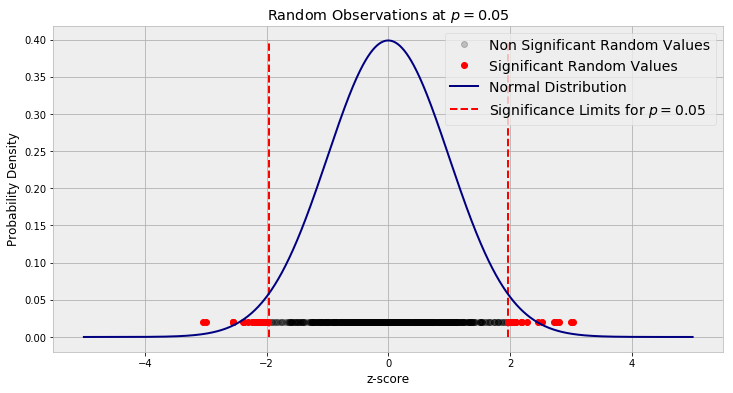

In [4]:

plt.plot(x_random_nonsig, y_constant_nonsig, 'ko', label = 'Non Significant Random Values', alpha = 0.2)
plt.plot(x_random_sig, y_constant_sig, 'ro', label = 'Significant Random Values')
plt.plot(x, y, '-', color = 'navy', label = 'Normal Distribution'); plt.xlabel('z-score'); plt.ylabel('Probability Density');
plt.vlines([stats.norm.ppf(0.975), stats.norm.ppf(0.025)],linestyles='--',
           color = 'red', linewidth=2,
           ymin = 0, ymax = y.max(), label='Significance Limits for $p = 0.05$')
plt.legend(prop={'size': 14});
plt.title('Random Observations at $p=0.05$');

In [5]:
# Non significant random values at p = 0.05 with correction
x_random_nonsig = [x for x in x_random if abs(x) < stats.norm.ppf(1 - (0.025/n_tests))]
y_constant_nonsig = [0.02 for _ in range(len(x_random_nonsig))]

# Significant random values at p = 0.05 with correction
x_random_sig = [x for x in x_random if abs(x) > stats.norm.ppf(1 - (0.025/n_tests))]
y_constant_sig = [0.02 for _ in range(len(x_random_sig))]

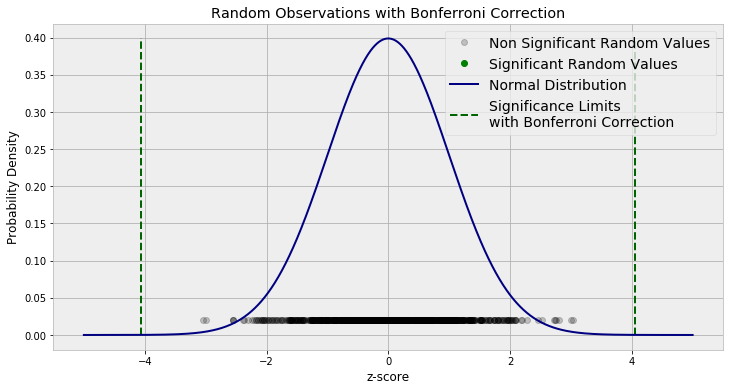

In [6]:





plt.plot(x_random_nonsig, y_constant_nonsig, 'ko', label = 'Non Significant Random Values', alpha = 0.2)
plt.plot(x_random_sig, y_constant_sig, 'go', label = 'Significant Random Values')
plt.plot(x, y, '-', color = 'navy', label = 'Normal Distribution'); plt.xlabel('z-score'); plt.ylabel('Probability Density');

plt.vlines([stats.norm.ppf(1 - (0.025/n_tests)), stats.norm.ppf(0.025/n_tests)],linestyles='--',
           color = 'darkgreen', linewidth=2,
           ymin = 0, ymax = y.max(), label='Significance Limits \nwith Bonferroni Correction')
plt.legend(prop={'size': 14});
plt.title('Random Observations with Bonferroni Correction');

